**California Housing Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/housing[1].csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print("\nMissing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
X = df[['median_income']]
y = df['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print("\n Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



📊 Model Evaluation:
Mean Squared Error: 7091157771.76555
R² Score: 0.45885918903846656


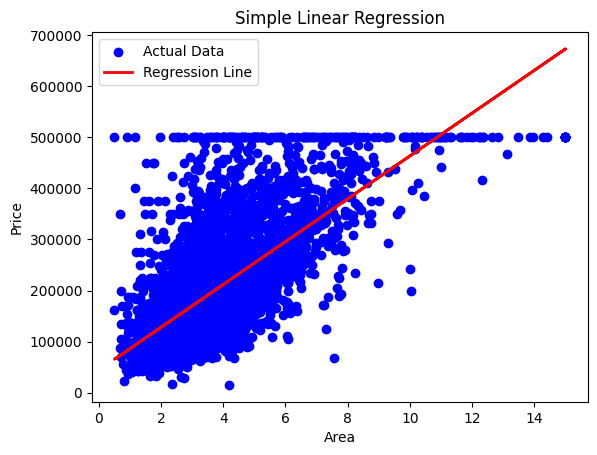

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

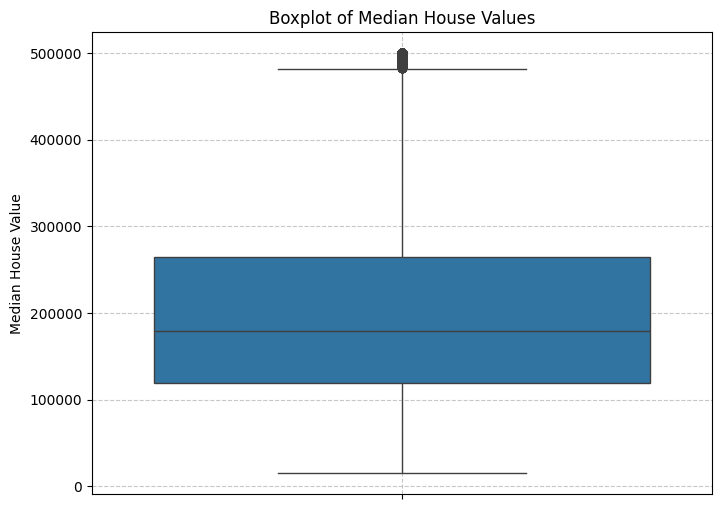

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['median_house_value'])
plt.title('Boxplot of Median House Values')
plt.ylabel('Median House Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [19]:
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-2549053295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


In [20]:
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [22]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

print("DataFrame after one-hot encoding:\n", df_encoded.head())

DataFrame after one-hot encoding:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   Fa

In [23]:
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:\n", X.head())
print("\nFirst 5 rows of y:\n", y.head())

Shape of X: (20640, 13)
Shape of y: (20640,)

First 5 rows of X:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0       322.0       126.0         8.3252                      False   
1      2401.0      1138.0         8.3014                      False   
2       496.0       177.0         7.2574                      False   
3       558.0       219.0         5.6431                      False   
4       565.0       259.0         3.8462                      False   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 13)
Shape of X_test: (4128, 13)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [26]:
y_pred = model.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


In [27]:
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R\u00b2 Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error: 4908476721.156623
R² Score: 0.6254240620553602


## Visualize Actual vs. Predicted Values

### Subtask:
Create a scatter plot comparing the actual house values against the predicted house values to visually assess the model's accuracy and identify any patterns or discrepancies.


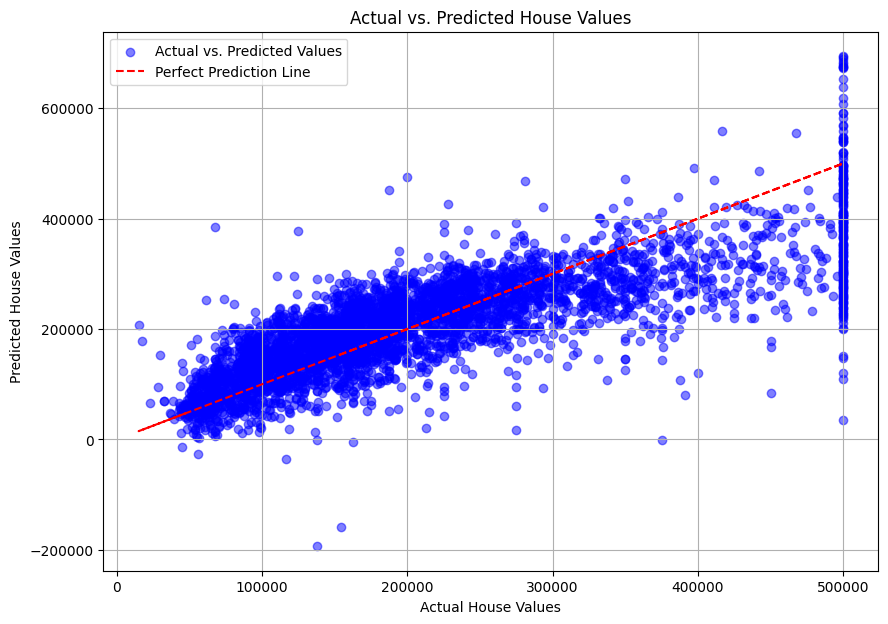

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted Values', color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs. Predicted House Values')
plt.legend()
plt.grid(True)
plt.show()